In [1]:
# Installing dependencies
%pip install numpy
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Loading the dataset
diabetes_data = pd.read_csv('./diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
## observing the shape of the data --> (#_rows, #_cols)
diabetes_data.shape

(768, 9)

In [5]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [6]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
%pip install sklearn

#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# 'test_size' — This parameter decides the size of the data that has to be split as the test dataset. This is given as a fraction
# 'random_state' - an integer, which will act as the seed for the random number generator during the split. Setting the random_state is desirable for reproducibility
# 'stratify' - makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify. For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

Note: you may need to restart the kernel to use updated packages.


In [8]:
X_train.shape

(512, 8)

In [9]:
X_test.shape

(256, 8)

In [10]:
# StandardScaler() will normalize the features i.e. each column of X, INDIVIDUALLY (!!!) so that each column/feature/variable will have μ = 0 and σ = 1.
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Compute the mean and std to be used for later scaling.
scaler.fit(X_train)

# Perform standardization by centering and scaling
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

# K-NN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [12]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [13]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.171875 % and k = [9, 10, 11]


### K-NN Result Visualisation

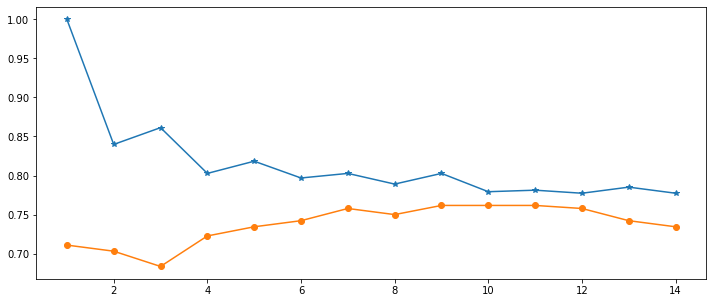

In [14]:
plt.figure(figsize=(12,5))
plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
plt.plot(range(1,15),test_scores,marker='o',label='Test Score')

This one compares...

#### The best result is captured at k = 11 hence 11 is used for the final model

In [32]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76171875

## Model Performance Analysis

In [16]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Better ways to display Confusion Matrix

Predicted,0,1,All
True,,,
0,145,22,167
1,39,50,89
All,184,72,256


In [17]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       167
           1       0.69      0.56      0.62        89

    accuracy                           0.76       256
   macro avg       0.74      0.72      0.72       256
weighted avg       0.76      0.76      0.75       256



In [18]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

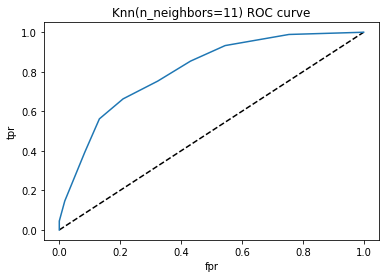

In [19]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [20]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8042454417008679

In [39]:
#### Export the scaler and model ####

import pickle
# Export the scaler
with open('./diabetes-scaler.pkl', 'wb') as scaler_pkl:
  pickle.dump(scaler, scaler_pkl)

# Export the model
with open('./diabetes-knn-model.pkl', 'wb') as model_pkl:
  pickle.dump(knn, model_pkl)

In [40]:
#### Import the scaler and model ####

import pickle

# Import all the packages you need for your model below
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Load the scaler 
with open('./diabetes-scaler.pkl', 'rb') as scaler_pkl:
    scaler_load = pickle.load(scaler_pkl)
    
# Load the model
with open('./diabetes-knn-model.pkl', 'rb') as model_pkl:
    knn_load = pickle.load(model_pkl)

In [43]:
# Unseen data (create a new observation for testing)
# Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
# 6	148	72	35	0	33.6	0.627	50	1
# 1	85	66	29	0	26.6	0.351	31	0
# 8	183	64	0	0	23.3	0.672	32	1

X_unseen = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50], [1, 85, 66, 29, 0, 26.6, 0.351, 31], [8, 183, 64, 0, 0, 23.3, 0.672, 32]])
# X_unseen = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])

# Apply the scale
X_unseen_scale = scaler_load.transform(X_unseen)

# Get the result
result = knn_load.predict(X_unseen_scale)

# Print result to the console
print('Predicted result for observation ' + str(X_unseen) + ' is: ' + str(result))

Predicted result for observation [[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]] is: [0 0 1]
